## ディープラーニング基礎

### 準備

In [79]:
# import module
from keras import optimizers
from keras.callbacks import LearningRateScheduler
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [80]:
# print shape
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [81]:
# reshape
# 60000行, 784列(文字情報ベクトル)に変換する
# 訓練データ; 6000, テストデータ: 1000とする
X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

### モデル構築

In [84]:
# モデルインスタンスを作成する
model = Sequential()
# 入力ユニット数は784, 1つ目の全結合層の出力ユニット数は256
model.add(Dense(256, input_dim=784))
# 活性化関数(sigmoid)
model.add(Activation("sigmoid"))
# 入力ユニット数は256, 2つ目の全結合層の出力ユニット数は128
model.add(Dense(128))
model.add(Activation("relu"))
# 3つ目の全結合層（出力層）の出力ユニット数は10
model.add(Dense(10))
model.add(Activation("softmax"))

# optimizer
sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer="sgd", loss="categorical_crossentropy", 
              metrics=["accuracy"])

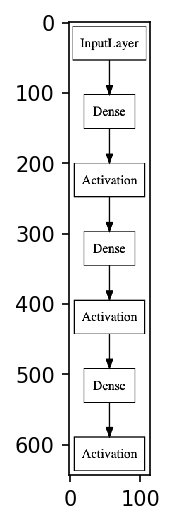

In [83]:
# モデル構造の出力
plot_model(model, "../image/model_str1.png", show_layer_names=False)
# モデル構造の可視化
image = plt.imread("../image/model_str1.png")
plt.figure(dpi=150)
plt.imshow(image)
plt.show()

### モデルの学習と評価

In [85]:
# verbose: 出力結果を表示するか(0or1)
# epochs: 同じデータセットに対して, 繰り返し学習を行う回数
history = model.fit(X_train, y_train, verbose=1, epochs=100)

Epoch 1/100
6000/6000 [==============================] - 1s 189us/step - loss: 1.3531 - acc: 0.6385
Epoch 2/100
6000/6000 [==============================] - 1s 104us/step - loss: 0.6365 - acc: 0.8502
Epoch 3/100
6000/6000 [==============================] - 1s 102us/step - loss: 0.4630 - acc: 0.8853
Epoch 4/100
6000/6000 [==============================] - 1s 102us/step - loss: 0.3838 - acc: 0.8987
Epoch 5/100
6000/6000 [==============================] - 1s 117us/step - loss: 0.3395 - acc: 0.9125
Epoch 6/100
6000/6000 [==============================] - 1s 122us/step - loss: 0.3114 - acc: 0.9152
Epoch 7/100
6000/6000 [==============================] - 1s 106us/step - loss: 0.2849 - acc: 0.9227
Epoch 8/100
6000/6000 [==============================] - 1s 120us/step - loss: 0.2662 - acc: 0.9338
Epoch 9/100
6000/6000 [==============================] - 1s 120us/step - loss: 0.2523 - acc: 0.9348
Epoch 10/100
6000/6000 [==============================] - 1s 106us/step - loss: 0.2400 - acc: 0.9352

6000/6000 [==============================] - 1s 113us/step - loss: 0.0104 - acc: 0.9992
Epoch 83/100
6000/6000 [==============================] - 2s 297us/step - loss: 0.0103 - acc: 0.9993
Epoch 84/100
6000/6000 [==============================] - 1s 110us/step - loss: 0.0101 - acc: 0.9993
Epoch 85/100
6000/6000 [==============================] - 1s 108us/step - loss: 0.0094 - acc: 0.9995
Epoch 86/100
6000/6000 [==============================] - 1s 175us/step - loss: 0.0090 - acc: 0.9995
Epoch 87/100
6000/6000 [==============================] - 1s 124us/step - loss: 0.0089 - acc: 0.9993
Epoch 88/100
6000/6000 [==============================] - 1s 114us/step - loss: 0.0088 - acc: 0.9995
Epoch 89/100
6000/6000 [==============================] - 1s 119us/step - loss: 0.0085 - acc: 0.9995
Epoch 90/100
6000/6000 [==============================] - 1s 132us/step - loss: 0.0082 - acc: 0.9993
Epoch 91/100
6000/6000 [==============================] - 1s 140us/step - loss: 0.0079 - acc: 0.9995
Epo

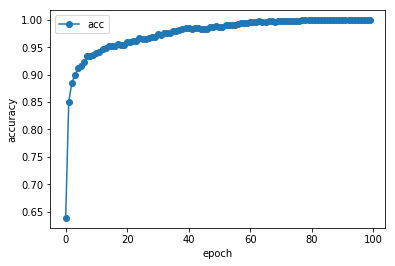

In [86]:
#acc(訓練データに対する精度)のプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

In [87]:
# 汎化精度 (損失関数, 正解率)
score = model.evaluate(X_test, y_test, verbose=1)

1000/1000 [==============================] - 0s 209us/step


In [88]:
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

evaluate loss: 0.2857363839149475
evaluate acc: 0.92


### モデルによる分類

In [25]:
import numpy as np

In [41]:
# axis = 1 (行), axis = 0 (列), なし (全て)
pred = np.argmax(model.predict(X_test[0:10]),axis = 1)
print(pred)

[7 2 1 0 4 1 4 9 6 9]


## ハイパーパラメータ

- 隠れ層が多くなると, 過学習等が起こりやすくなる! Dropoutを使うと, 適宜ユニットを削除できる
- 活性化関数(シグモイド関数, Relu関数)
- 損失関数
    - 二乗誤差: 回帰問題
    - クロスエントロピー誤差: 分類問題
- 最適化関数: SGD(確率的勾配降下), Adagrad等
https://qiita.com/tokkuman/items/1944c00415d129ca0ee9
https://keras.io/optimizers/

- 学習率: 各層の重みを一度にどの程度変更するか
- バッチサイズ: 一度にモデルに渡す入力データの数
    - 癖の強いデータが多い時には, バッチサイズを大きくする
    - 同じようなデータが多い時はバッチサイズを小さくする
- エポック数: 反復学習を行う回数, 適切なタイミングで学習を打ち切ることで過学習を防げる

In [89]:
# 学習率を途中で変化させる.
def step_decay(epoch):
    x = 0.1
    if epoch >= 50: x = 0.05
    if epoch >= 75: x = 0.01
    return x
# 実行
lr_decay = LearningRateScheduler(step_decay)

Train on 6000 samples, validate on 1000 samples
Epoch 1/100
6000/6000 [==============================] - 2s 265us/step - loss: 0.7853 - acc: 0.7750 - val_loss: 0.5410 - val_acc: 0.8330
Epoch 2/100
6000/6000 [==============================] - 1s 150us/step - loss: 0.4000 - acc: 0.8858 - val_loss: 0.4979 - val_acc: 0.8470
Epoch 3/100
6000/6000 [==============================] - 1s 162us/step - loss: 0.3894 - acc: 0.8835 - val_loss: 0.4270 - val_acc: 0.8680
Epoch 4/100
6000/6000 [==============================] - 1s 174us/step - loss: 0.3626 - acc: 0.8915 - val_loss: 0.4226 - val_acc: 0.8580
Epoch 5/100
6000/6000 [==============================] - 1s 171us/step - loss: 0.3479 - acc: 0.8948 - val_loss: 0.4455 - val_acc: 0.8560
Epoch 6/100
6000/6000 [==============================] - 1s 171us/step - loss: 0.3117 - acc: 0.9067 - val_loss: 0.4045 - val_acc: 0.8780
Epoch 7/100
6000/6000 [==============================] - 1s 187us/step - loss: 0.3095 - acc: 0.9082 - val_loss: 0.4111 - val_acc: 

6000/6000 [==============================] - 1s 170us/step - loss: 0.1356 - acc: 0.9577 - val_loss: 0.2838 - val_acc: 0.9220
Epoch 61/100
6000/6000 [==============================] - 1s 165us/step - loss: 0.1386 - acc: 0.9562 - val_loss: 0.3093 - val_acc: 0.8980
Epoch 62/100
6000/6000 [==============================] - 1s 177us/step - loss: 0.1597 - acc: 0.9462 - val_loss: 0.2847 - val_acc: 0.9100
Epoch 63/100
6000/6000 [==============================] - 1s 185us/step - loss: 0.1415 - acc: 0.9545 - val_loss: 0.2801 - val_acc: 0.9020
Epoch 64/100
6000/6000 [==============================] - 1s 184us/step - loss: 0.1393 - acc: 0.9548 - val_loss: 0.3151 - val_acc: 0.9030
Epoch 65/100
6000/6000 [==============================] - 1s 186us/step - loss: 0.1407 - acc: 0.9543 - val_loss: 0.2805 - val_acc: 0.9140
Epoch 66/100
6000/6000 [==============================] - 1s 178us/step - loss: 0.1440 - acc: 0.9507 - val_loss: 0.2483 - val_acc: 0.9210
Epoch 67/100
6000/6000 [=======================

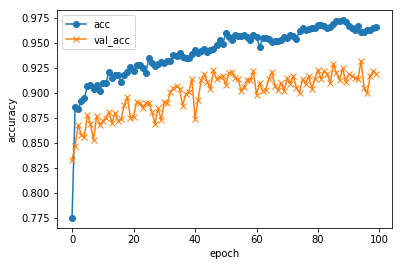

evaluate loss: 0.2595015336871147
evaluate acc: 0.919


In [95]:
# モデルインスタンスを作成する
model = Sequential()
# 入力ユニット数は784, 1つ目の全結合層の出力ユニット数は256
model.add(Dense(256, input_dim=784))
# 活性化関数(sigmoid)
model.add(Activation("sigmoid"))
# 入力ユニット数は150, 2つ目の全結合層の出力ユニット数は128
model.add(Dense(128))
model.add(Activation("relu"))
# Drop out
# model.add(Dropout(rate=0.5))

# 3つ目の全結合層（出力層）の出力ユニット数は10
model.add(Dense(10))
model.add(Activation("softmax"))

# optimizer
#sgd = optimizers.SGD(lr=0.1)
adam = optimizers.Adam(lr=0.01)

model.compile(optimizer="adam", loss="categorical_crossentropy", 
              metrics=["accuracy"])
# fitting
#history = model.fit(X_train, y_train, epochs=10, verbose=1, 
 #                   validation_data=(X_test, y_test),
  #                  callbacks=[lr_decay])
history = model.fit(X_train, y_train, epochs=100, verbose=1, 
                    validation_data=(X_test, y_test))

#acc, val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

In [96]:
model